In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/craigslist-carstrucks-data/vehicles.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
vehicles = pd.read_csv('../input/craigslist-carstrucks-data/vehicles.csv')
vehicles.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [4]:
# print shape and column names
print(vehicles.columns)
print(vehicles.shape)

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')
(426880, 26)


In [5]:
vehicles.describe(include='all')

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
count,4.268800e+05,426880,426880,426880,4.268800e+05,425675.000000,409234,421603,252776,249202,...,120519,334022,296677,426812,426810,0.0,426880,420331.000000,420331.000000,426812
unique,NaN,426880,404,413,NaN,NaN,42,29667,6,8,...,4,13,12,241899,360911,NaN,51,NaN,NaN,381536
top,NaN,https://slo.craigslist.org/ctd/d/grover-beach-...,columbus,https://spokane.craigslist.org,NaN,NaN,ford,f-150,good,6 cylinders,...,full-size,sedan,white,https://images.craigslist.org/00N0N_1xMPvfxRAI...,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,NaN,ca,NaN,NaN,2021-04-23T22:13:05-0400
freq,NaN,1,3608,2988,NaN,NaN,70985,8009,121456,94169,...,63465,87056,79285,7357,231,NaN,50614,NaN,NaN,12
mean,7.311487e+09,NaN,NaN,NaN,7.519903e+04,2011.235191,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.493940,-94.748599,NaN
std,4.473170e+06,NaN,NaN,NaN,1.218228e+07,9.452120,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.841533,18.365462,NaN
min,7.207408e+09,NaN,NaN,NaN,0.000000e+00,1900.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-84.122245,-159.827728,NaN
25%,7.308143e+09,NaN,NaN,NaN,5.900000e+03,2008.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.601900,-111.939847,NaN
50%,7.312621e+09,NaN,NaN,NaN,1.395000e+04,2013.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.150100,-88.432600,NaN
75%,7.315254e+09,NaN,NaN,NaN,2.648575e+04,2017.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.398900,-80.832039,NaN


In [6]:
# check type of each variable
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [7]:
# total null value for each column
vehicles.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [8]:
# sorting columns based on their total null
null_val = pd.DataFrame(vehicles.isnull().sum(), columns = ['Nan_sum'])
null_val = null_val[null_val['Nan_sum']>0]
null_val['Percentage'] = (null_val['Nan_sum']/len(vehicles))*100
null_val = null_val.sort_values(by=['Nan_sum'], ascending=False)
null_val

,Nan_sum,Percentage
county,426880,100.000000
size,306361,71.767476
cylinders,177678,41.622470
condition,174104,40.785232
VIN,161042,37.725356
drive,130567,30.586347
paint_color,130203,30.501078
type,92858,21.752717
manufacturer,17646,4.133714
title_status,8242,1.930753


In [9]:
#Because county and region are almost the same, so i will drop county
#vehicles = vehicles.drop('county', axis=0)


In [10]:
#price_out= vehicles['price']

In [11]:
#low=0.5
#high=0.95
#quant_df = price_out.quantile([low, high])
#print(quant_df)

In [12]:
#price_out=price_out.apply(lambda x: x[(x>price_out.loc[low,x.name]) &(x<quant_df.loc[high, x.name])])

In [13]:
#To remove the outliers in the price column using percentiles
price=['price']
Q1=vehicles.quantile(0.25)
Q3= vehicles.quantile(0.75)
IQR=Q3-Q1

vehicles=vehicles[~((vehicles[price] < (Q1 -1.5 *IQR ))|(vehicles[price] > (Q3 + 1.5 * IQR))).any(axis=1)]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  import sys


In [14]:
#To replace the missing values in the size
vehicles['size'].mode()
vehicles['size'].fillna('full-size', inplace = True)

**FOR CYLINDER**

In [15]:

# Changing cylinders of tesla cars to 0
vehicles.loc[vehicles.manufacturer == 'tesla', 'cylinders'] = 0
vehicles.cylinders.fillna(0, inplace = True)
vehicles.cylinders =  vehicles.cylinders.replace('other', 0)

In [16]:
# Changing cylinder of all 2019 honda accords to 4
vehicles.loc[((vehicles.manufacturer == 'honda') & (vehicles.year == 2019) & (vehicles.model == 'accord')), 'cylinders'] = 4

vehicles.loc[((vehicles.manufacturer == 'honda') & (vehicles.year == 2020) & (vehicles.model == 'accord')),'cylinders'] = 4

In [17]:
vehicles.cylinders.value_counts()

0               174961
6 cylinders      92925
4 cylinders      77463
8 cylinders      69324
5 cylinders       1709
10 cylinders      1386
3 cylinders        646
12 cylinders       150
4                  139
Name: cylinders, dtype: int64

In [18]:
vehicles.cylinders.replace('4 cylinders','4' ,inplace = True)
vehicles.cylinders.replace('6 cylinders','6', inplace = True)
vehicles.cylinders.replace('8 cylinders','8', inplace = True)
vehicles.cylinders.replace('5 cylinders','5', inplace = True)
vehicles.cylinders.replace('10 cylinders','10', inplace = True)
vehicles.cylinders.replace('3 cylinders','3', inplace = True)
vehicles.cylinders.replace('12 cylinders','12', inplace = True)

vehicles.cylinders.value_counts()

0     174961
6      92925
4      77463
8      69324
5       1709
10      1386
3        646
12       150
4        139
Name: cylinders, dtype: int64

**FOR CONDITION**

In [19]:
vehicles.condition.replace('like new', 'excellent', inplace = True)
vehicles.condition.replace('new', 'excellent', inplace = True)

In [20]:
vehicles.condition.value_counts()

excellent    121753
good         120751
fair           6755
salvage         601
Name: condition, dtype: int64

In [21]:
#for the missing values in condition, sinc e a car should be at least fair enough, we will replace null vehicles with fair.
vehicles['condition'].mode()
vehicles['condition'].fillna('fair', inplace = True)

**FOR FUEL**

In [22]:
vehicles['fuel'].mode()
vehicles['fuel'].fillna('gas', inplace = True)

In [23]:
#Gasoline is the most commonly used U.S. transportation fuel.So we replace the null values of fuel with gas.
vehicles.fuel.value_counts()

gas         355681
other        29754
diesel       26500
hybrid        5139
electric      1629
Name: fuel, dtype: int64

**FOR TRANSMISSION**

In [24]:
vehicles.transmission.value_counts()

automatic    329229
other         62392
manual        24593
Name: transmission, dtype: int64

In [25]:
vehicles['transmission'].fillna('automatic', inplace = True)

In [26]:
# converting 'posting_date' from object to datetime
vehicles['posting_date'] = pd.to_datetime(vehicles['posting_date'], utc=True)

<AxesSubplot:xlabel='year'>

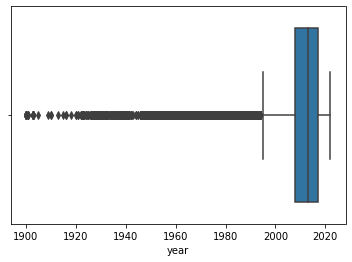

In [27]:
sns.boxplot(x=vehicles['year'])

In [28]:
# Removing rows with missing year 
#vehicles.drop(vehicles[vehicles['year'].isna()].index, inplace = True) 
# Changing type of year to int
#vehicles['year'] = vehicles['year'].astype(int)
#vehicles['year'].dtype

**FOR MANUFACTURER**

In [29]:
vehicles.manufacturer.value_counts()

ford               68846
chevrolet          53643
toyota             34022
honda              21253
nissan             19041
jeep               18885
ram                17470
gmc                15952
bmw                14545
dodge              13539
mercedes-benz      11447
hyundai            10338
subaru              9493
volkswagen          9341
kia                 8457
lexus               8172
audi                7345
cadillac            6809
chrysler            6008
acura               5964
buick               5494
mazda               5427
infiniti            4799
lincoln             4168
volvo               3320
mitsubishi          3292
mini                2376
pontiac             2279
rover               1979
jaguar              1933
porsche             1245
mercury             1182
saturn              1089
alfa-romeo           896
fiat                 792
tesla                779
harley-davidson      153
datsun                63
ferrari               24
land rover            21


In [30]:
vehicles['manufacturer'].fillna('toyota', inplace = True)

**FOR TYPE**

In [31]:
vehicles.type.value_counts()

sedan          86786
SUV            76560
pickup         41833
truck          33319
other          21462
coupe          18632
hatchback      16587
wagon          10725
van             8383
convertible     7422
mini-van        4816
offroad          602
bus              515
Name: type, dtype: int64

In [32]:
vehicles['type'].fillna('SUV', inplace = True)

In [33]:
vehicles.drive.value_counts()

4wd    127042
fwd    105195
rwd     57794
Name: drive, dtype: int64

In [34]:
vehicles['drive'].fillna('4wd', inplace = True)

<AxesSubplot:xlabel='price', ylabel='odometer'>

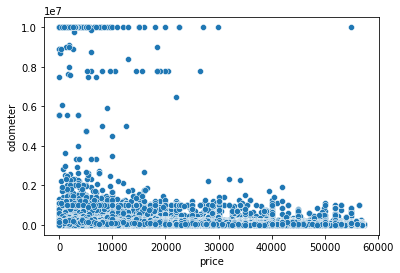

In [35]:
#Must check the data for outliers
sns.scatterplot(data = vehicles, x = "price", y = "odometer")

In [36]:
# Deleting unwanted records. I looked at the distribution graph and saw some really high values for both Odometer and Price.
#I am going to delete them...
# cutoff at 300,000km and $40K

vehicles1 =vehicles[vehicles['odometer'] < 300000]
vehicles2 = vehicles1[vehicles1['odometer'] > 1000]
vehicles3 = vehicles2[vehicles2['price'] > 1000]
vehicles = vehicles3[vehicles3['price'] < 40000]

In [37]:
vehicles.shape

(339382, 26)

In [38]:
vehicles.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year               592
manufacturer         0
model             3337
condition            0
cylinders            0
fuel                 0
odometer             0
title_status      5588
transmission         0
VIN             131991
drive                0
size                 0
type                 0
paint_color      94822
image_url            0
description          1
county          339382
state                0
lat               3089
long              3089
posting_date         0
dtype: int64

In [39]:
#If car is Suv and USE 4WD
#iF IS SEDAN USE rwd
#If car is
#https://www.wallacechev.com/blog/whats-the-difference-between-fwd-rwd-awd-and-4wd/

#vehicles.loc[((vehicles.type == 'SUV') & (vehicles.drive == 'NaN')), 'drive'] = 4wd
#vehicles.loc[((vehicles.type == 'sedan') & (vehicles.drive == 'NaN')),'drive'] = rwd

In [40]:
vehicles = vehicles[vehicles['model'].notna()]
vehicles = vehicles[vehicles['year'].notna()]

In [41]:
drop_out=['id','county','image_url','VIN','url', 'region_url' ,'description' ,'title_status', 'paint_color','lat','long']
vehicles.drop(drop_out, axis = 1,inplace=True)
#df.drop(columns=[], inplace=True)

In [42]:

print(vehicles.isnull().sum())
print(vehicles.shape)

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
drive           0
size            0
type            0
state           0
posting_date    0
dtype: int64
(335453, 15)


In [43]:
#Encoding the categorical data
def onehot_encode(vehicles, columns, prefixes):
    vehicles = vehicles.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(vehicles[column], prefix=prefix)
        vehicles = pd.concat([vehicles, dummies], axis=1)
        vehicles = vehicles.drop(column, axis=1)
    return vehicles

In [44]:
vehicles = onehot_encode(
    vehicles
    ['region', 'fuel', 'transmission', 'state','model','drive','manufacturer','model','condition','size','type'],
 ['reg_1', 'fuel_1', 'trans_1', 'state_1','model_1','drive_1','manufacturer_1','model_1','condition_1','size_1','type_1']

SyntaxError: unexpected EOF while parsing (<ipython-input-44-e39d1c327d1f>, line 4)